 📦 Import modules


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

 🔧 Custom imports from src/


In [34]:


sys.path.append(str(Path("..")))  # Allows importing from /src

from src.data_loader import load_news_data
from src.sentiment_analysis import apply_sentiment

Load the Data

In [35]:

df = load_news_data("../data/raw_analyst"
"_ratings/raw_analyst"
"_ratings.csv")
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Headline Length Analysis
We'll analyze how long each headline is and visualize the distribution.

🔹 Add Headline Length Column

In [36]:
df['headline_length'] = df['headline'].apply(len)


🔹 Plot Headline Length Distribution

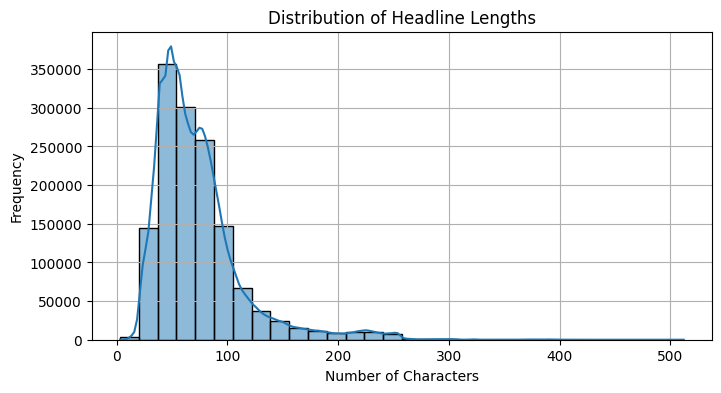

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Publisher Frequency
Let’s see which publishers are the most active in your dataset.

🔹 Count & Plot Top Publishers

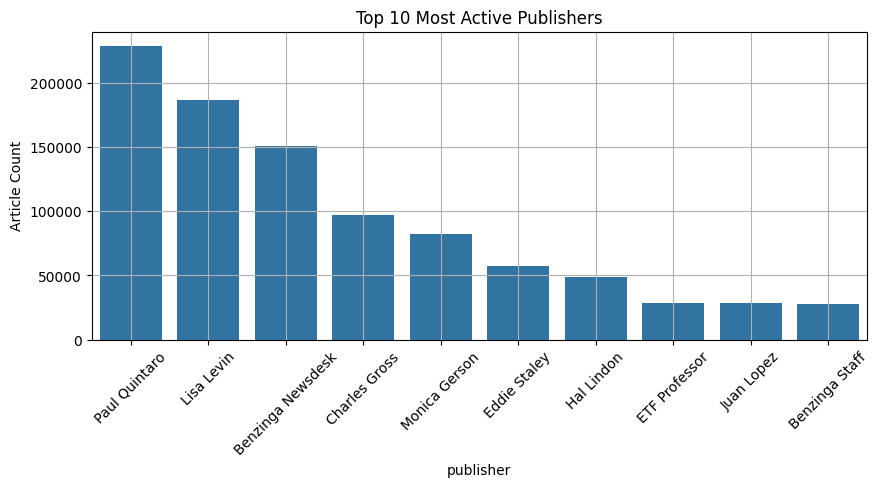

In [38]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Time-Based EDA — Publication Frequency Over Time
This helps us understand how the volume of news changes across time.

✅  Convert and Normalize Dates
Make sure the date column is in datetime format and normalized to just the date (strip the time):

In [39]:


# Force datetime parsing; convert invalids to NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Extract only the date part for daily analysis
df['publish_day'] = df['date'].dt.date



Daily Article Count Plot

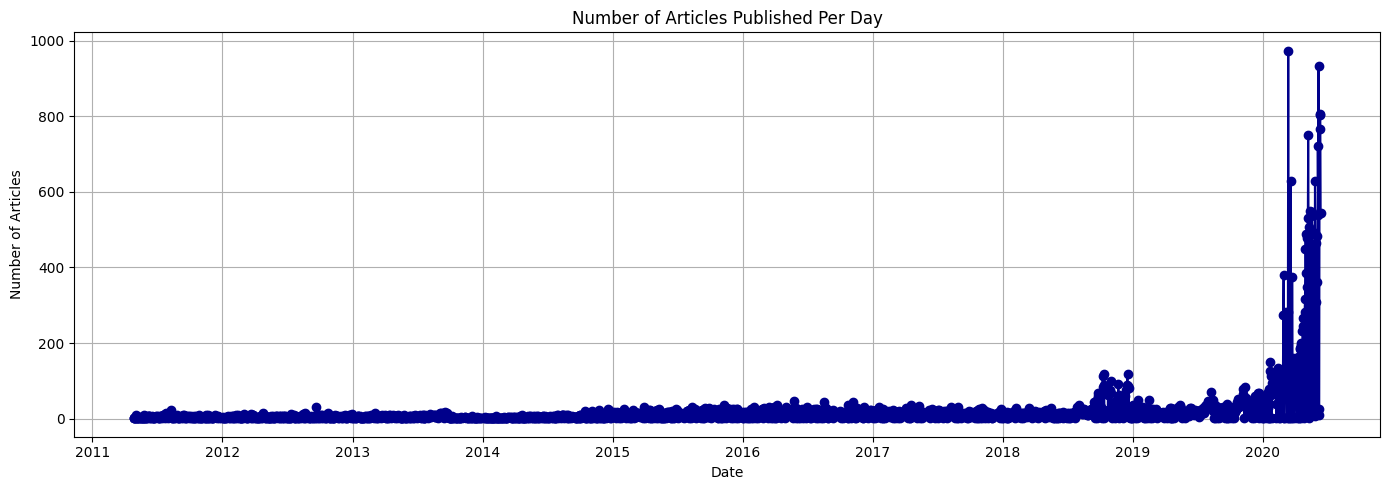

In [40]:


# Group by publish_day and count
daily_counts = df.groupby('publish_day').size()

# Plot
plt.figure(figsize=(14, 5))
daily_counts.plot(kind='line', marker='o', color='darkblue')
plt.title("Number of Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


 Hour of Day Analysis (Optional, But Cool)

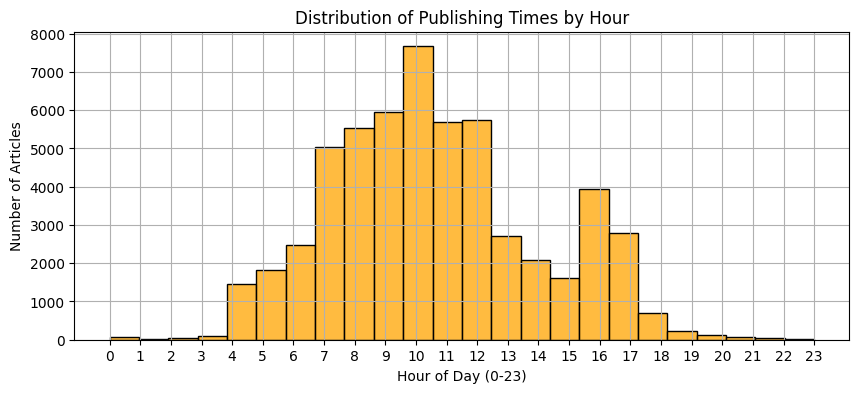

In [41]:
# Extract hour from timestamp
df['publish_hour'] = df['date'].dt.hour

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['publish_hour'], bins=24, kde=False, color='orange')
plt.title("Distribution of Publishing Times by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Articles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [42]:
sys.path.append(str(Path("..")))  # for importing from /src

from src.sentiment_analysis import apply_sentiment

# Apply sentiment analysis
df = apply_sentiment(df)

# Preview the result
df[['headline', 'sentiment_score']].head()

,headline,sentiment_score
0,Stocks That Hit 52-Week Highs On Friday,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0
2,71 Biggest Movers From Friday,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0


 Visualize Sentiment Score Distribution

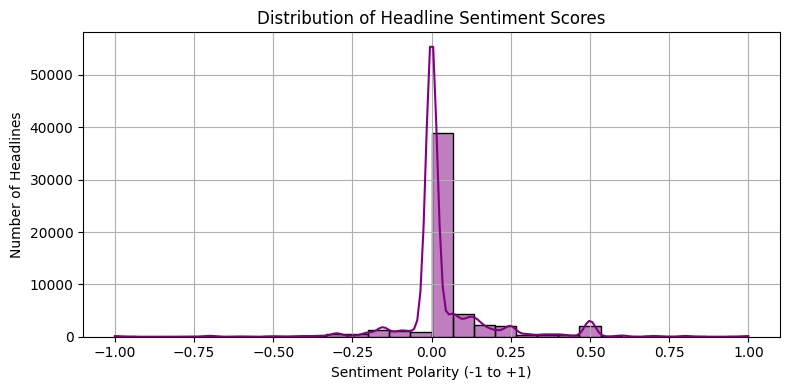

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color="purple")
plt.title("Distribution of Headline Sentiment Scores")
plt.xlabel("Sentiment Polarity (-1 to +1)")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.show()

 Sentiment by Publisher

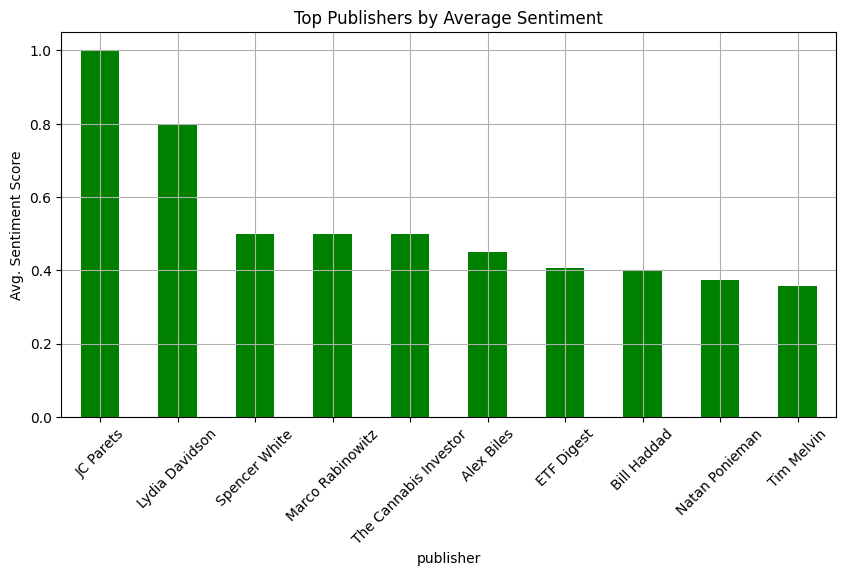

In [44]:
publisher_sentiment = df.groupby("publisher")['sentiment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
publisher_sentiment.head(10).plot(kind='bar', color='green')
plt.title("Top Publishers by Average Sentiment")
plt.ylabel("Avg. Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Basic Keyword Frequency
First, let’s get the most common words from the headlines (excluding stopwords).

🔹 1. Install Stopwords (if not already)

In [45]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Cyber
[nltk_data]     Defense\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

 Tokenize & Clean Headlines

In [46]:
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    return text

# Flatten all words into one list
all_words = []

for headline in df['headline'].dropna():
    cleaned = clean_text(headline)
    tokens = cleaned.split()
    filtered = [word for word in tokens if word not in stop_words]
    all_words.extend(filtered)

# Count word frequency
word_counts = Counter(all_words)


Show Top Keywords


In [47]:

top_keywords = word_counts.most_common(15)
for word, freq in top_keywords:
    print(f"{word}: {freq}")

stocks: 12796
week: 8959
shares: 8375
q: 7104
trading: 6574
hit: 5898
eps: 5530
price: 5043
companies: 4778
target: 4675
several: 4650
sales: 4422
higher: 4269
market: 4025
estimate: 3818


Visualize Word Frequency (Bar Chart)

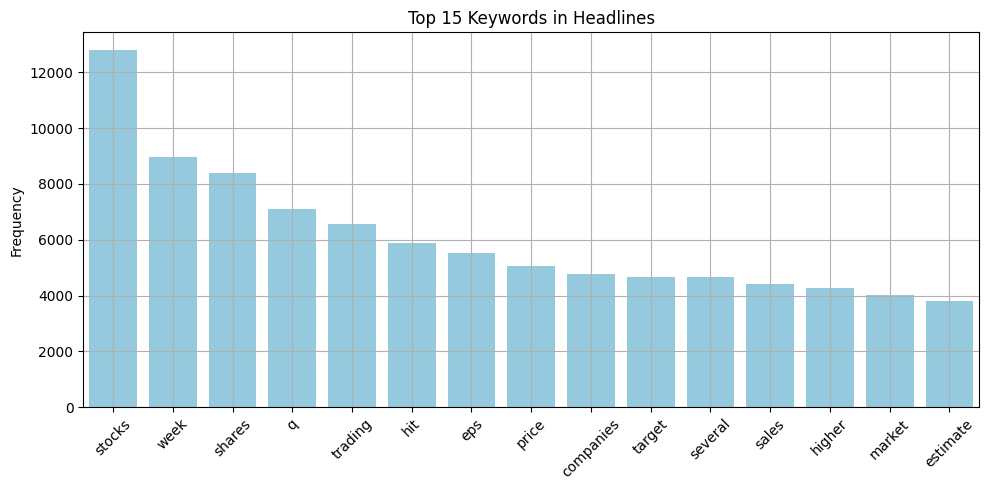

In [48]:
import matplotlib.pyplot as plt

words, counts = zip(*top_keywords)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), color="skyblue")
plt.title("Top 15 Keywords in Headlines")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Optional Word Cloud


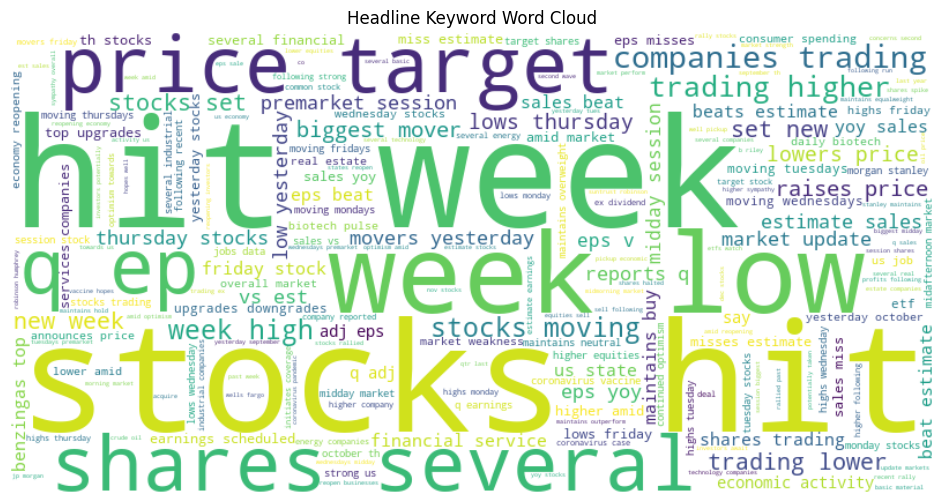

In [49]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Headline Keyword Word Cloud")
plt.show()

 Publisher Analysis,

This step answers:

Who are the top contributors?

Do different publishers have different tones (sentiment)?

Are there publishers that dominate at specific times?

 Top Publishers by Count


C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_38852\3169994154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


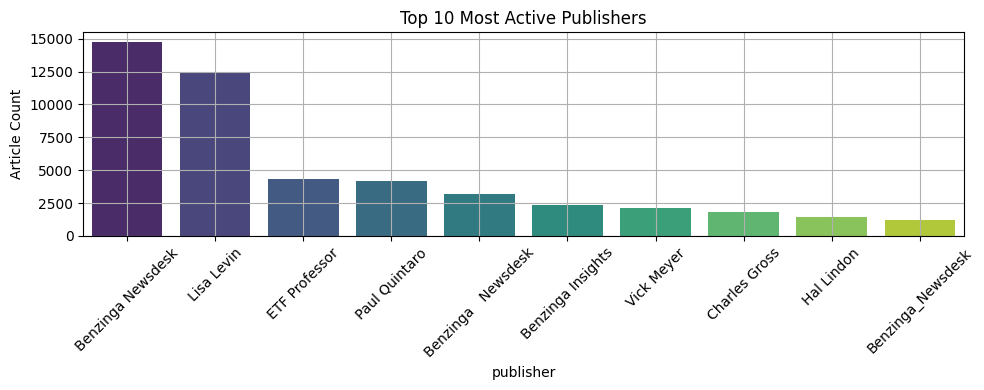

In [50]:

top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Publisher vs. Sentiment
This helps answer: Do some publishers report more positively/negatively than others?



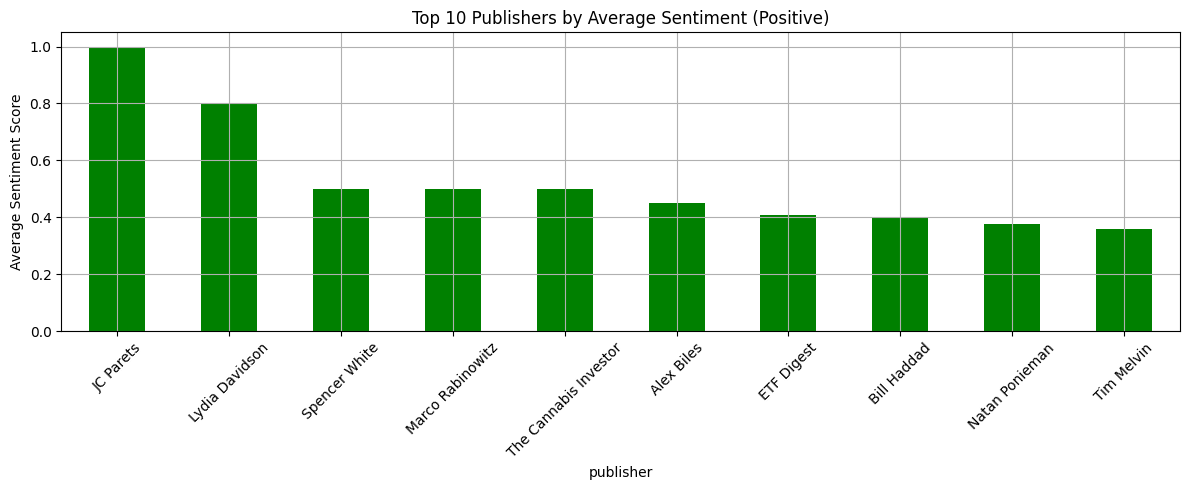

In [51]:

avg_sentiment_by_publisher = df.groupby('publisher')['sentiment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
avg_sentiment_by_publisher.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Publishers by Average Sentiment (Positive)")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Flip to show most negative:



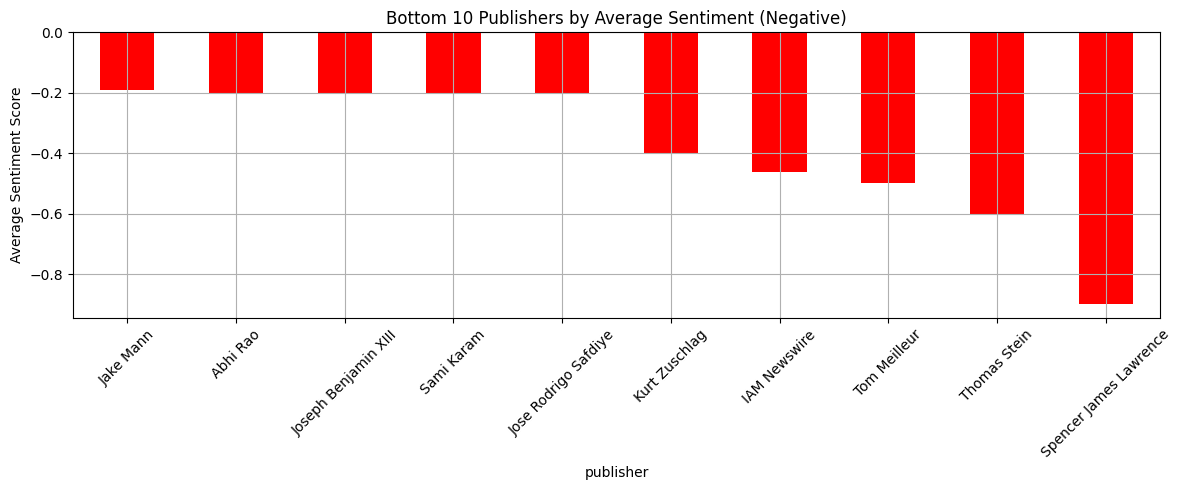

In [52]:

plt.figure(figsize=(12, 5))
avg_sentiment_by_publisher.tail(10).plot(kind='bar', color='red')
plt.title("Bottom 10 Publishers by Average Sentiment (Negative)")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Publisher Domain Frequency (if applicable)
If you have publisher email-like formats (e.g., name@domain.com), extract domains:



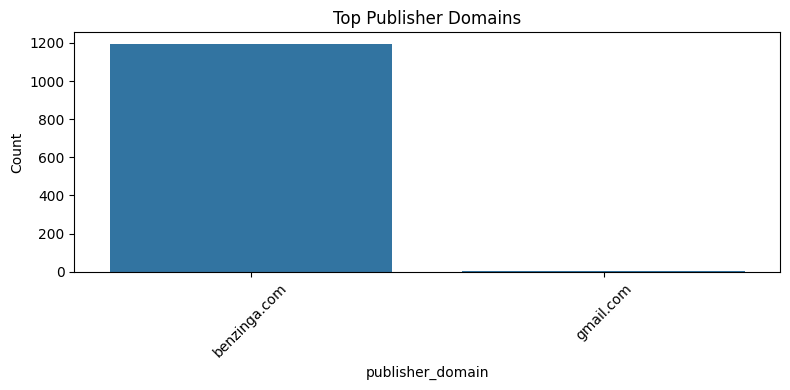

In [53]:

df['publisher_domain'] = df['publisher'].str.extract(r'@([\w.-]+)')
domain_counts = df['publisher_domain'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title("Top Publisher Domains")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()